In [1]:
!ls


IMDB Dataset.csv
debug.log
no emotions data.zip
paragraphs extraction from article.py
sarcasm.json
tcsrio_project.ipynb


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
data=pd.read_csv("IMDB Dataset.csv")

In [4]:
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [30]:
import json
import tensorflow as tf

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [32]:
vocab_size = 10000
embedding_dim = 16
max_length = 100
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"
training_size = 20000


In [33]:
with open("sarcasm.json", 'r') as f:
    datastore = json.load(f)

sentences = []
labels = []

for item in datastore:
    sentences.append(item['headline'])
    labels.append(item['is_sarcastic'])

In [34]:
training_sentences = sentences[0:training_size]
testing_sentences = sentences[training_size:]
training_labels = labels[0:training_size]
testing_labels = labels[training_size:]

In [35]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)

word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [36]:
training_padded = np.array(training_padded)
training_labels = np.array(training_labels)
testing_padded = np.array(testing_padded)
testing_labels = np.array(testing_labels)

In [37]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [38]:
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 16)           160000    
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 24)                408       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 25        
Total params: 160,433
Trainable params: 160,433
Non-trainable params: 0
_________________________________________________________________


In [39]:
num_epochs = 30
history = model.fit(training_padded, training_labels, epochs=num_epochs, validation_data=(testing_padded, testing_labels), verbose=2)

Train on 20000 samples, validate on 6709 samples
Epoch 1/30
20000/20000 - 7s - loss: 0.6618 - accuracy: 0.5865 - val_loss: 0.5701 - val_accuracy: 0.6821
Epoch 2/30
20000/20000 - 4s - loss: 0.4211 - accuracy: 0.8357 - val_loss: 0.3904 - val_accuracy: 0.8298
Epoch 3/30
20000/20000 - 4s - loss: 0.3082 - accuracy: 0.8758 - val_loss: 0.3516 - val_accuracy: 0.8533
Epoch 4/30
20000/20000 - 5s - loss: 0.2573 - accuracy: 0.8999 - val_loss: 0.3473 - val_accuracy: 0.8548
Epoch 5/30
20000/20000 - 4s - loss: 0.2221 - accuracy: 0.9136 - val_loss: 0.3443 - val_accuracy: 0.8577
Epoch 6/30
20000/20000 - 4s - loss: 0.1949 - accuracy: 0.9255 - val_loss: 0.3518 - val_accuracy: 0.8574
Epoch 7/30
20000/20000 - 4s - loss: 0.1738 - accuracy: 0.9348 - val_loss: 0.3657 - val_accuracy: 0.8547
Epoch 8/30
20000/20000 - 4s - loss: 0.1564 - accuracy: 0.9434 - val_loss: 0.3855 - val_accuracy: 0.8518
Epoch 9/30
20000/20000 - 4s - loss: 0.1409 - accuracy: 0.9485 - val_loss: 0.4485 - val_accuracy: 0.8317
Epoch 10/30
200

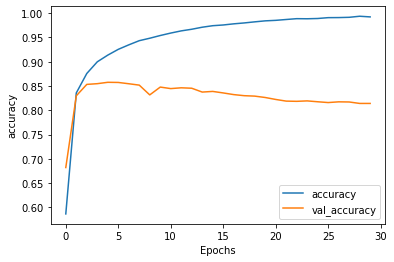

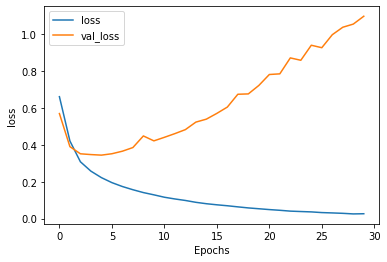

In [40]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [41]:
sentence = ["granny starting to fear spiders in the garden might be real", "game of thrones season finale showing this sunday night"]
sequences = tokenizer.texts_to_sequences(sentence)
padded = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
print(model.predict(padded))

[[9.396296e-01]
 [6.086618e-06]]


In [94]:
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from textblob import TextBlob
from nltk.stem import PorterStemmer
from nltk.stem import LancasterStemmer
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords

In [54]:
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [45]:
data["review"][0]

"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fa

In [95]:
import re

TAG_RE = re.compile(r'<[^>]+>')

def remove_tags(text):
    return TAG_RE.sub('', text)

In [96]:
p=remove_tags(data["review"][0])
p

"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.I would say the main appeal of the show is due to the fact that it goes where other shows wo

In [97]:
data["sentiment"][0]


'positive'

In [90]:
testimonial = TextBlob(p)
testimonial.sentiment.polarity
testimonial.sentiment

Sentiment(polarity=0.023433179723502305, subjectivity=0.4903686635944701)

In [91]:
tokenized_text=sent_tokenize(p)
tokenized_text

["One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked.",
 'They are right, as this is exactly what happened with me.The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO.',
 'Trust me, this is not a show for the faint hearted or timid.',
 'This show pulls no punches with regards to drugs, sex or violence.',
 'Its is hardcore, in the classic use of the word.It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary.',
 'It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda.',
 "Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.I would say the main appeal of the show is due to the fact that it 

In [92]:
tokenized_word=word_tokenize(p)
tokenized_word

['One',
 'of',
 'the',
 'other',
 'reviewers',
 'has',
 'mentioned',
 'that',
 'after',
 'watching',
 'just',
 '1',
 'Oz',
 'episode',
 'you',
 "'ll",
 'be',
 'hooked',
 '.',
 'They',
 'are',
 'right',
 ',',
 'as',
 'this',
 'is',
 'exactly',
 'what',
 'happened',
 'with',
 'me.The',
 'first',
 'thing',
 'that',
 'struck',
 'me',
 'about',
 'Oz',
 'was',
 'its',
 'brutality',
 'and',
 'unflinching',
 'scenes',
 'of',
 'violence',
 ',',
 'which',
 'set',
 'in',
 'right',
 'from',
 'the',
 'word',
 'GO',
 '.',
 'Trust',
 'me',
 ',',
 'this',
 'is',
 'not',
 'a',
 'show',
 'for',
 'the',
 'faint',
 'hearted',
 'or',
 'timid',
 '.',
 'This',
 'show',
 'pulls',
 'no',
 'punches',
 'with',
 'regards',
 'to',
 'drugs',
 ',',
 'sex',
 'or',
 'violence',
 '.',
 'Its',
 'is',
 'hardcore',
 ',',
 'in',
 'the',
 'classic',
 'use',
 'of',
 'the',
 'word.It',
 'is',
 'called',
 'OZ',
 'as',
 'that',
 'is',
 'the',
 'nickname',
 'given',
 'to',
 'the',
 'Oswald',
 'Maximum',
 'Security',
 'State',
 '

In [93]:
from nltk.probability import FreqDist
fdist = FreqDist(tokenized_word)
print('Sampling ', fdist)
print('The first 3 frequently used tokens are')
fdist.most_common(3)

Sampling  <FreqDist with 206 samples and 353 outcomes>
The first 3 frequently used tokens are


[(',', 26), ('the', 14), ('.', 10)]

In [80]:
import string

In [81]:
def tokenize_filtered(text):
    text_tokens=text.translate(str.maketrans('', '', string.punctuation))
    text_tokens = word_tokenize(text_tokens)
    tokens_without_sw =[word for word in text_tokens if not word in stopwords.words()]
    return tokens_without_sw

In [82]:
pos_words=[]
neg_words=[]
def polar(words):
    all_tokens=tokenize_filtered(words)
    for i in all_tokens:
        analysis=TextBlob(i)
        polarity=analysis.sentiment.polarity
        if polarity>0:
            pos_words.append(i)
        if polarity<0:
            neg_words.append(i)
    return pos_words,neg_words

In [84]:
s=tokenize_filtered(data["review"][0])

In [85]:
fdist = FreqDist(s)
print('Sampling ', fdist)
print('The first 3 frequently used tokens are')
fdist.most_common(3)

Sampling  <FreqDist with 153 samples and 184 outcomes>
The first 3 frequently used tokens are


[('I', 6), ('Oz', 4), ('violence', 4)]